<a href="https://colab.research.google.com/github/Satwikram/NLP-Implementations/blob/main/DocTR-OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
!git clone https://github.com/mindee/doctr

Cloning into 'doctr'...
remote: Enumerating objects: 9344, done.
remote: Counting objects: 100% (4205/4205), done.
remote: Compressing objects: 100% (1544/1544), done.
remote: Total 9344 (delta 2872), reused 3590 (delta 2435), pack-reused 5139
Receiving objects: 100% (9344/9344), 9.45 MiB | 24.20 MiB/s, done.
Resolving deltas: 100% (6151/6151), done.


In [ ]:
!pip install -qe doctr/.

     |████████████████████████████████| 49.9 MB 16 kB/s 
     |████████████████████████████████| 6.4 MB 47.3 MB/s 
     |████████████████████████████████| 123 kB 63.9 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 365 kB 69.9 MB/s 
     |████████████████████████████████| 241 kB 73.0 MB/s 
     |████████████████████████████████| 3.0 MB 47.4 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 2.0 MB 57.0 MB/s 
     |████████████████████████████████| 70 kB 7.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [ ]:
model = ocr_predictor(pretrained = True)

  0%|          | 0/94178964 [00:00<?, ?it/s]

  0%|          | 0/58758994 [00:00<?, ?it/s]

In [ ]:
model

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), method='bilinear')
      (normalize): Normalize(mean=[0.7979999780654907, 0.7850000262260437, 0.7720000147819519], std=[0.2639999985694885, 0.27489998936653137, 0.28700000047683716])
    )
    (model): DBNet(
      (feat_extractor): IntermediateLayerGetter()
      (fpn): FeaturePyramidNetwork(channels=128)
      (probability_head): <keras.engine.sequential.Sequential object at 0x7f6de8dd6f10>
      (threshold_head): <keras.engine.sequential.Sequential object at 0x7f6de8d91cd0>
      (postprocessor): DBPostProcessor(box_thresh=0.1)
    )
  )
  (reco_predictor): RecognitionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(32, 128), method='bilinear', preserve_aspect_ratio=True, symmetric_pad=False)
      (normalize): Normalize(mean=[0.6940000057220459, 0.6949999928474426, 0.6930000185966492], std=[0.29899999499320984, 0.2

In [ ]:
document = DocumentFile.from_images("/content/test.jpg")

In [ ]:
result = model(document)

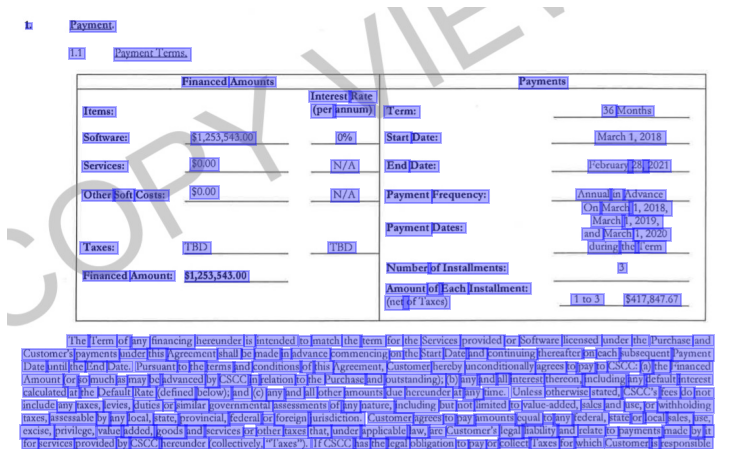

In [ ]:
result.show(document)

In [ ]:
json_response = result.export()

In [ ]:
json_response

In [ ]:
text = []

for words in json_response["pages"][0]["blocks"][0]["lines"][0]["words"]:
    text.append(words["value"])

" ".join(text)

'L. Payment. 1.1 PaymentTerms. Financed Amounts Payments Interest Rate Items: annum) Term: (per Months 36 Software: $1,253,543.00 Start 0% Date: March1,2018 $0,00 Services: End Date: N/A February 2021 28, $0.00 Other Soft Costs: Annual N/A Advance in Payment Frequency: March On 1,2018, March 1,2019, Dates: Payment March and 1,2020 Taxes: TBD TBD the Term during Number ofInstallments: 3 Financed Amount: $1,253,543.00 Amount Each Installment: ofl 1to3 $417,847.67 ofTaxcs) (net The Term of hereunder intended match to is the for the term Services financing Software under or licensed any Purchase the and provided Customer\'s under this. shall be in advance made Date on the Start Agreement payments and on thereafter commencing cach continuing subsequent Payment Date until the End Date. Pursuant to and the terms conditions Customer of this to to CSCC: Agreement, Financed unconditionally the hercby agrees pay (a) Amount much as SO advanced be relation Purchase to in CSCCi (or the and interest 

In [ ]:
from doctr.models import ocr_predictor

model1 = ocr_predictor(det_arch='db_resnet50', reco_arch='crnn_vgg16_bn', pretrained=True)

In [ ]:
pdf_doc = DocumentFile.from_pdf("test.pdf").as_images()

In [ ]:
result1 = model1(pdf_doc)

In [ ]:
result1.show(pdf_doc)

In [ ]:
json_response1 = result1.export()

In [ ]:
text = []

for i in range(len(json_response1["pages"])):
  for words in json_response1["pages"][i]["blocks"][0]["lines"][0]["words"]:
      text.append(words["value"])

" ".join(text)